# 2. 인공지능과 가위바위보 하기

## 목차
* 2-1. 인공지능과 가위바위보 하기
* 2-2. 데이터를 준비하자!
* 2-3. 딥러닝 네트워크 설계하기
* 2-4. 딥러닝 네트워크 학습시키기
* 2-5. 얼마나 잘 만들었는지 확인하기
* 2-6. 더 좋은 네트워크 만들어 보기

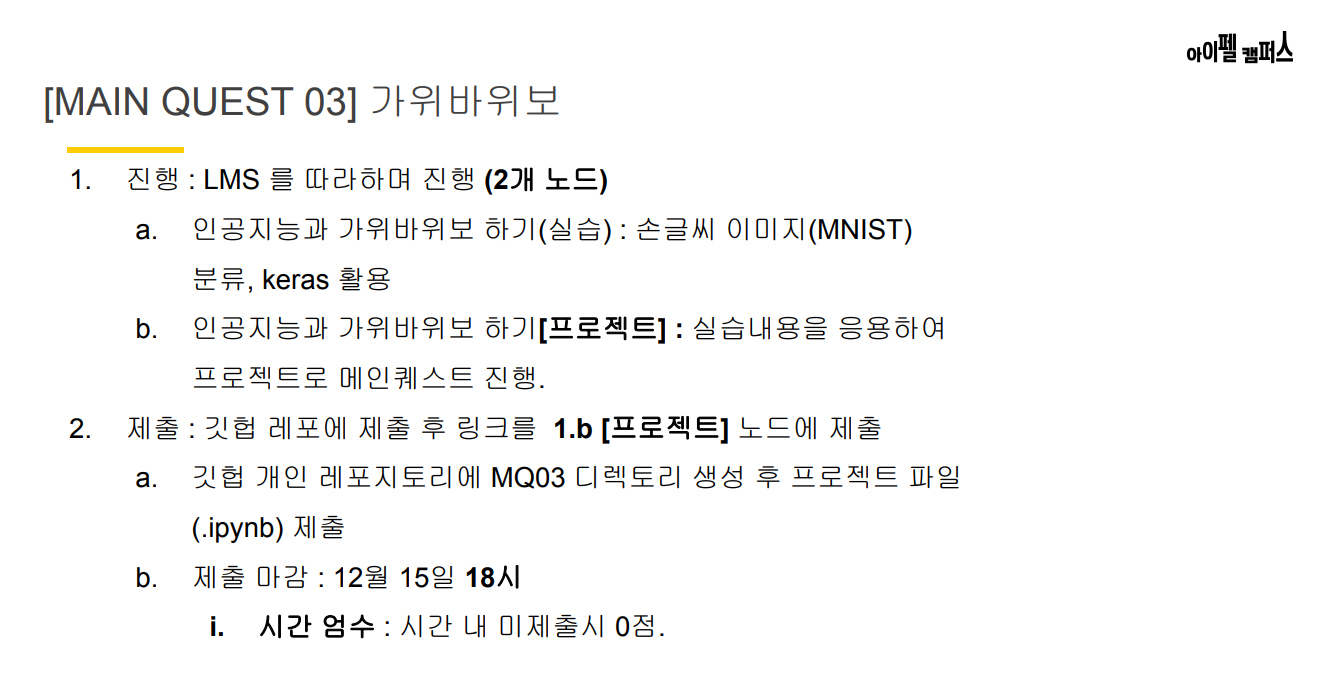
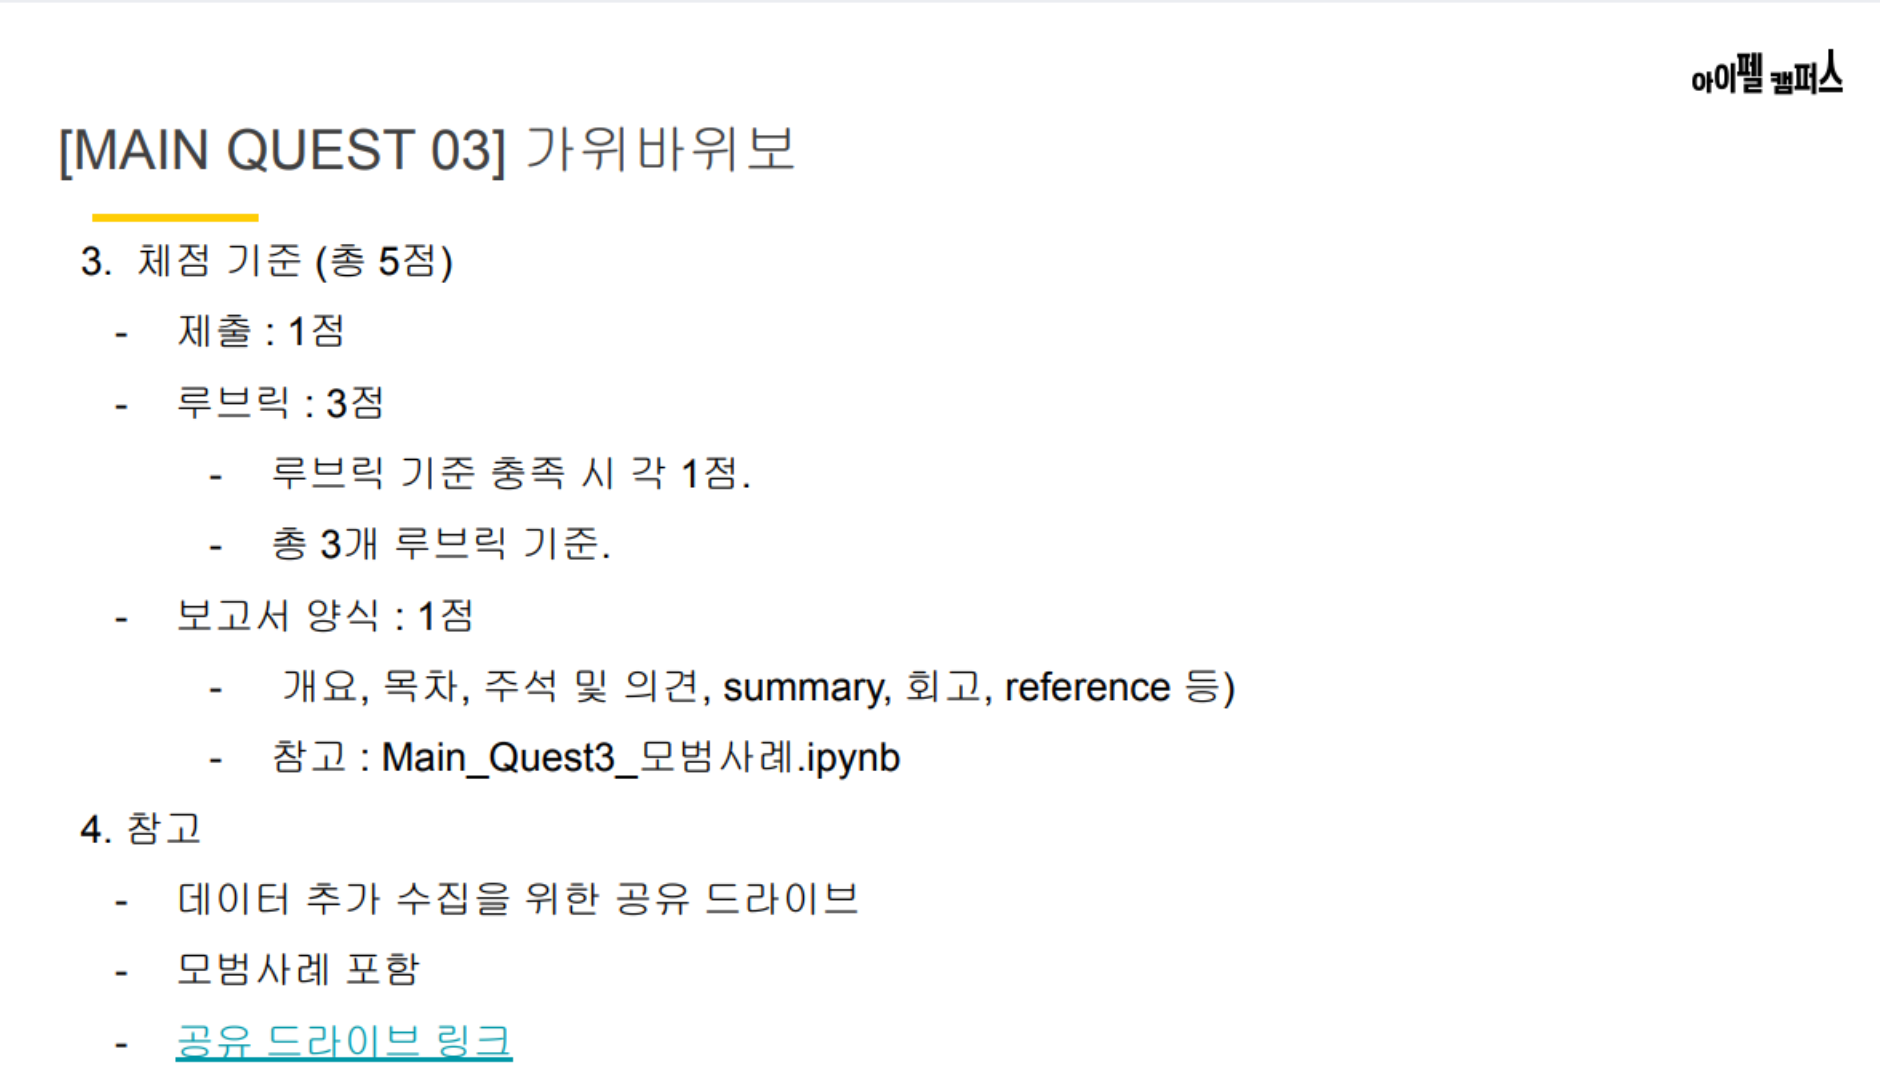
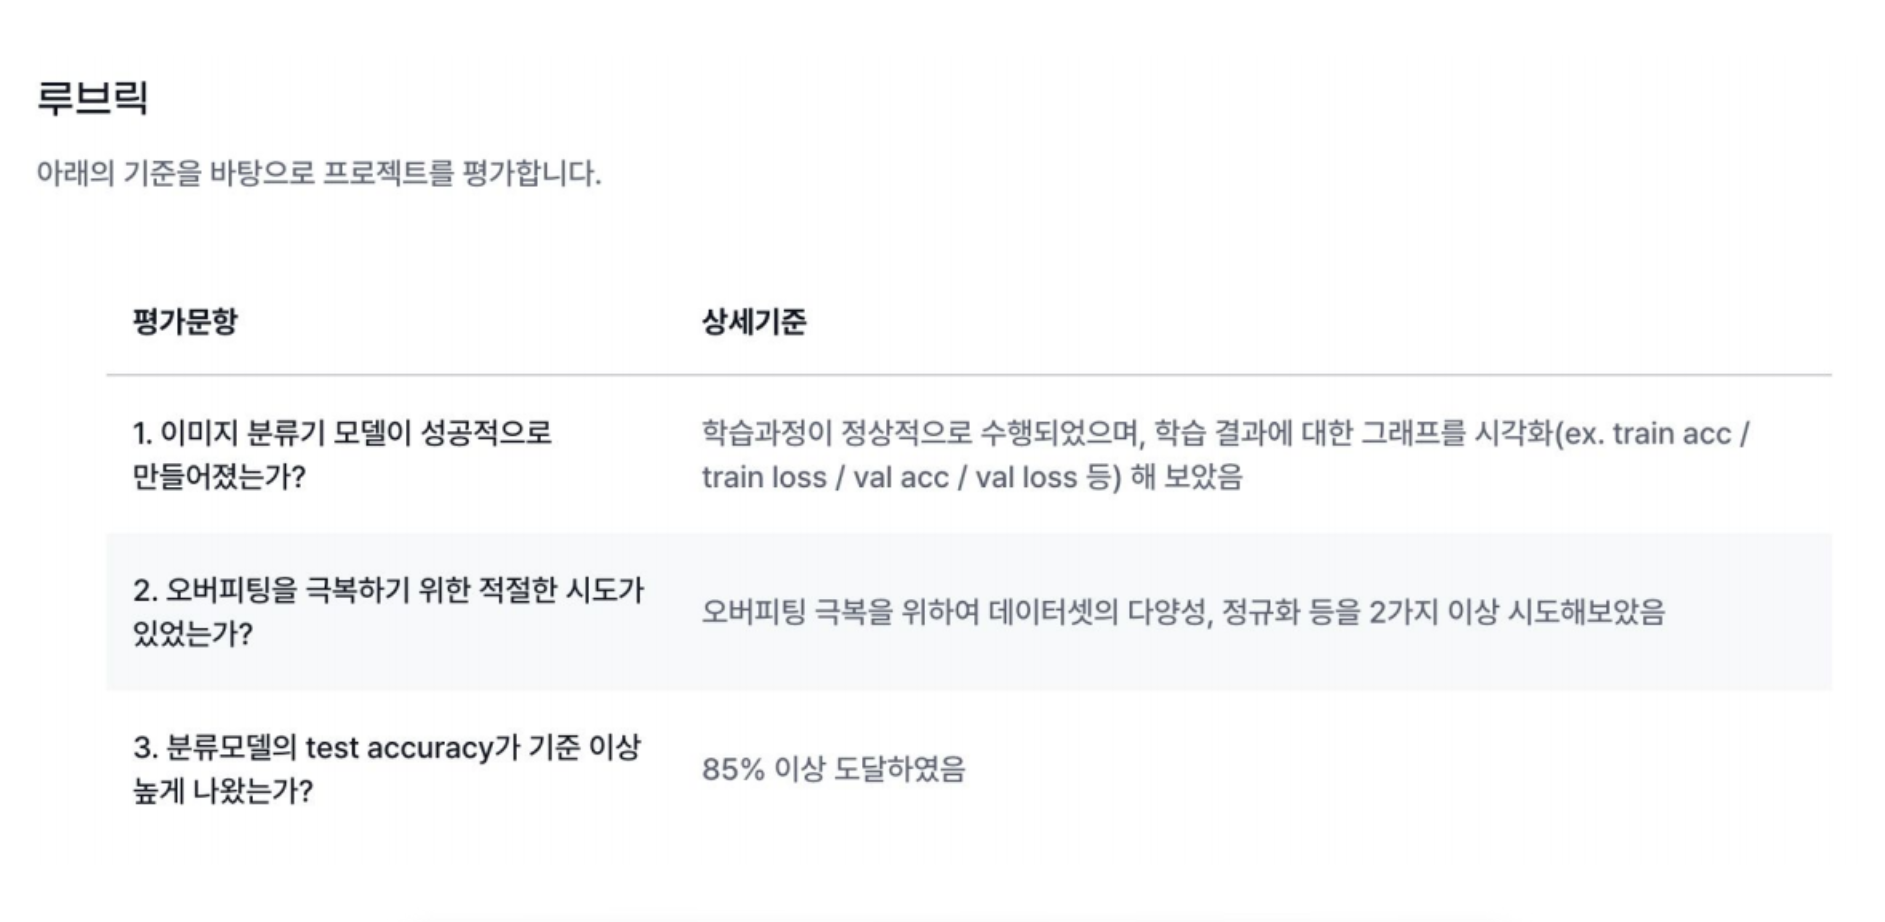

## 2-1. 인공지능과 가위바위보 하기


**간단한 이미지 분류기**

**1. 숫자 손글씨 인식 - 0~9까지의 총 10개의 클래스(class)**
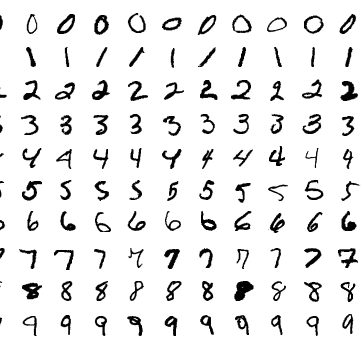
**2. 가위바위보 게임 만들기 - 총 3개의 클래스(class)**
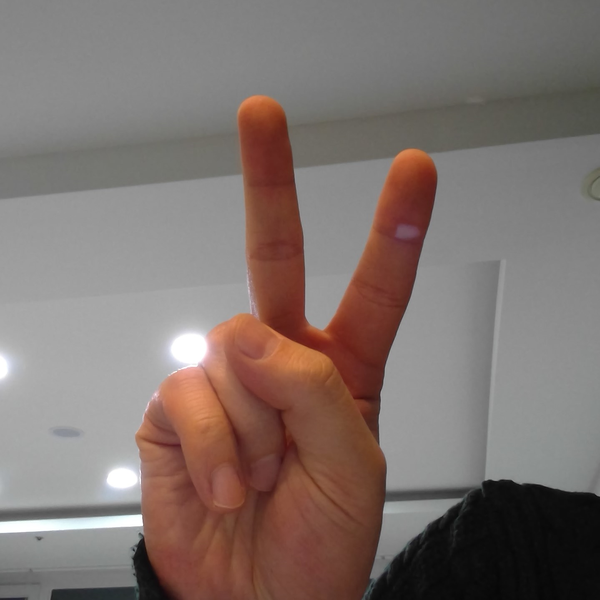

**3.이 외에도 실생활에서 만나볼 수 있는 간단한 이미지 분류기**

ex) 강아지 품종 분류기, 과일 종류 분류기, 남녀 이미지의 성별 분류기, 의료영상 암세포 양성/음성 분류기 등

**숫자 손글씨 인식기 만들기 (Sequential Model을 이용하는 방법)**
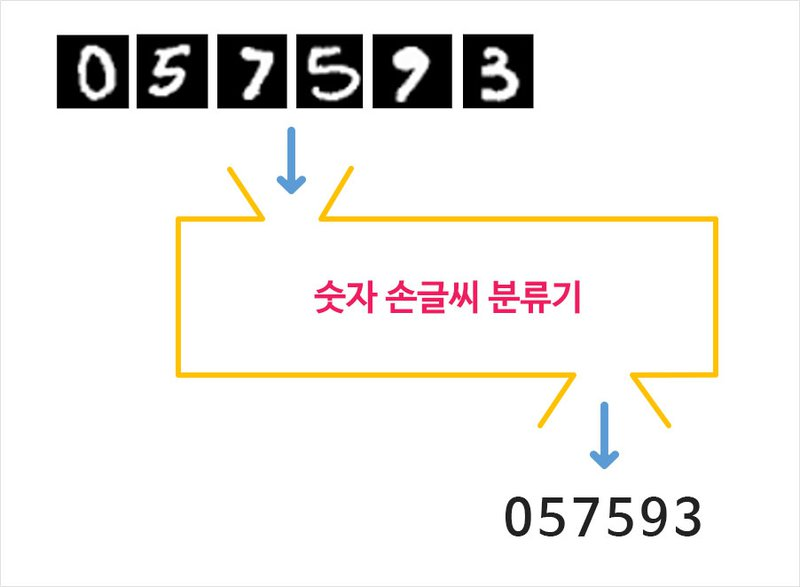

**어떻게 만들지?**

    "데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"

숫자 손글씨 분류기는 손으로 쓴 숫자 이미지를 입력으로 받으면, 그 이미지가 어떤 숫자를 나타내는지 출력
숫자 0에 해당하는 이미지가 입력되면, 숫자 0을 출력하고, 숫자 5에 해당하는 이미지가 입력으로 들어오면 숫자 5를 출력

**학습 목표**
* MNIST Dataset와 텐서플로우 Sequential API를 이용하여 숫자 손글씨 인식기를 만들어 볼 수 있다.
* Sequential Model을 활용하여 딥러닝 네트워크를 설계하고 학습 시킬 수 있다.
* 테스트 데이터로 성능을 확인하고 하이퍼파라미터 조정을 시도하여 성능을 높여볼 수 있다.
* 가위바위보 분류기를 만들기 위한 기본 데이터를 웹캠으로 제작 할 수 있다.

**학습 내용**
* 이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
* 정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
* 흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
* 분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)

## 2-2. 데이터를 준비하자!

**MNIST 숫자 손글씨 Dataset 불러들이기**

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
11501568/11490434 [==============================] - 0s 0us/step
60000


* 숫자 손글씨 이미지의 크기: 28 x 28
* MNIST dataset은 총 70000장으로, 60000장은 train_Set, 10000장은 test_set으로 구성되어 있음
* 학습용 데이터(training set)에는 대략 250명의 손글씨가 들어가 있음 

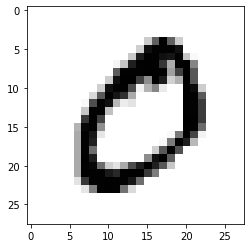

In [3]:
# 손글씨 이미지 하나 출력해보기
# MNIST 데이터셋의 X항목(x_train, x_test)은 이미지 데이터를 담은 행렬(matrix)이다.
plt.imshow(x_train[1],cmap=plt.cm.binary) # x_train[1]에 담긴 이미지는 x_train 행렬의 1번째가 아니라 2번째 이미지이다.1번째 이미지는 x_train[0]에 담겨 있다.
plt.show() 

In [4]:
# y_train 행렬의 2번째 값을 확인
print(y_train[1])

0


Y항목(위 코드의 y_train, y_test)에는 X항목에 들어있는 이미지에 대응하는 실제 숫자 값이 담겨 있는 것을 확인하실 수 있다.

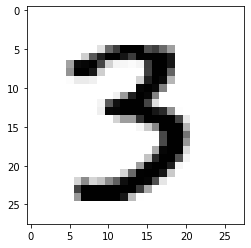

10001 번째 이미지의 숫자는 바로  3 입니다.


In [5]:
# index에 0에서 59999 사이 숫자를 지정
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

**참고: Matplotlib 이란?**

파이썬에서 제공하는 시각화(Visualization) 패키지인 Matplotlib은 차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 강력한 기능을 제공한다.

**학습용 데이터와 시험용 데이터**

(x_train, y_train), (x_test, y_test) = mnist.load_data()

* mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것을 볼 수 있다.

* 우리가 만든 숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train)만을 가지고 학습시키며, 학습이 끝난 후에는 이 손글씨 분류기가 얼마나 좋은 성능을 보이는지 확인하기 위해 시험용 데이터(x_test,y_test)로 테스트한다.

MNIST 데이터셋은 약 500명 사용자가 작성한 숫자 이미지를 가지고 있으며, 그 중 250여명의 데이터가 학습용 데이터로, 다른 250여명의 데이터가 시험용 데이터로 이용된다.

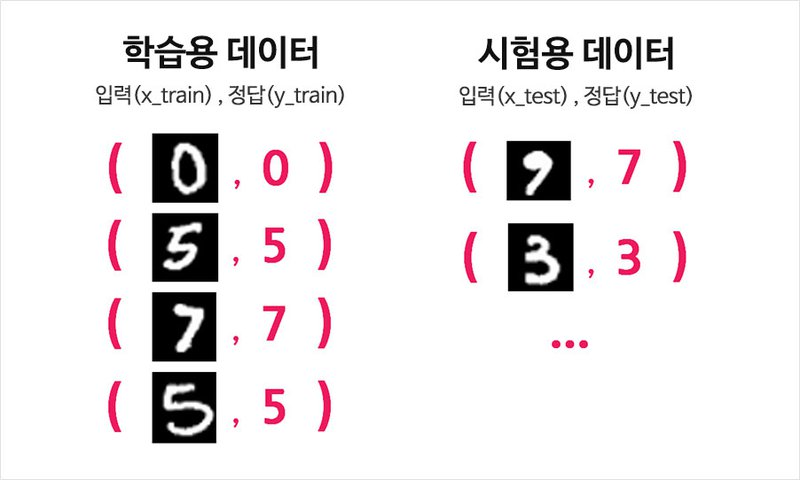


In [6]:
# 불러들인 학습용 데이터의 개수 확인
print(x_train.shape) # 28 x 28 크기의 숫자 이미지가 60,000장 있다.

(60000, 28, 28)


In [7]:
# 시험용 데이터의 개수 확인
print(x_test.shape) # 28 x 28 크기의 숫자 이미지가 10,000장 있다.

(10000, 28, 28)


**Train / Test / Validation set의 차이**

* Train set: 모델을 학습하기 위한 dataset이다.
    * 모델을 학습하는데에는 오직 유일하게 Train dataset만 이용한다.
    * 보통 train set을 이용해 각기 다른 모델을 서로 다른 epoch로 학습을 시킨다.
    여기서 각기 다른 모델이란 hidden layer 혹은 hyper parameter에 약간씩 변화를 줌을 뜻한다.

* validation set: 학습이 이미 완료된 모델을 검증하기위한 dataset이다.
* test set: 학습과 검증이 완료된 모델의 성능을 평가하기위한 dataset이다.

보통 Train : Test 데이터를 8 : 2로 나누는데 여기서 Train 데이터 중 일부를 validation set으로 이용해

결국 Train : Validation : Test 을 일반적으로 6 : 2 : 2로 이용한다.

**Q. 언제 검증용 데이터(validation set)를 사용하나요?**

: 머신러닝 학습 과정이 정상적으로 진행되고 있는지, 오버피팅이 발생하고 있지 않은지, 학습을 중단해도 되는지 등을 확인하고 싶을 때

**Q. 교차 검증(cross validation) 기법이란?**

: 교차검증(cross-validation)은 머신러닝에서 모델의 성능을 평가하는 방법 중 하나입니다. 데이터를 여러 개의 폴드로 나누고, 한 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련 세트로 사용하여 모델을 학습하고 평가하는 방법입니다. 교차검증을 통해 모델의 일반화 성능을 평가할 수 있습니다.

교차검증의 종류는 여러 가지가 있습니다. 가장 일반적인 방법은 K-겹 교차검증입니다. K-겹 교차검증은 데이터를 K개의 폴드로 나누고, 각 폴드를 한 번씩 테스트 세트로 사용합니다. K-겹 교차검증을 통해 모델의 성능을 K번 평가할 수 있습니다.

교차검증은 모델의 성능을 평가하는 데 매우 효과적인 방법입니다. 그러나 교차검증은 시간이 오래 걸릴 수 있습니다. 데이터가 많을 경우 교차검증을 수행하는 시간이 매우 오래 걸릴 수 있습니다.

교차검증은 모델의 성능을 평가하는 데 매우 효과적인 방법이지만, 시간이 오래 걸린다는 단점이 있습니다. 데이터가 많을 경우 교차검증을 수행하는 시간이 매우 오래 걸릴 수 있습니다.

**데이터 전처리하기**

In [8]:
print('최소값:',np.min(x_train), '최대값:',np.max(x_train)) # 숫자 손글씨 이미지의 실제 픽셀 값은 0~255사이의 값을 가진다.

최소값: 0 최대값: 255


In [9]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0 # 0~1 사이의 값으로 정규화시키기
print('최소값:',np.min(x_train_norm), '최대값:',np.max(x_train_norm))

최소값: 0.0 최대값: 1.0


## 2-3. 딥러닝 네트워크 설계하기

**Sequential Model을 사용해 보자**

데이터가 모두 준비가 되었다면 이제는 딥러닝 네트워크를 맏들기 위해 텐서플로우 케라스(tf.keras)에서 Sequential API라는 방법을 사용한다.

Sequential API는 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법이다. 이번 시간엔 이 방법을 통해 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있다.

케라스에서 모델을 만드는 방법은 Sequential API 외에도 Functional API를 이용하는 방법, 밑바닥부터 직접 코딩하는 방법 등 여러 방법이 있다.

다음의 코드는 tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예이다. 8줄밖에 안되는 간단한 코드이지만, 손글씨 숫자 분류기를 구현하는 데는 충분하다.

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1))) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu')) # 분류기에 사용되는 뉴런의 수(복잡한 문제일수록 이 수를 늘린다.)
model.add(keras.layers.Dense(10, activation='softmax')) # 0~9까지의 (총 10개) 분류해야 하는 클래스 수

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


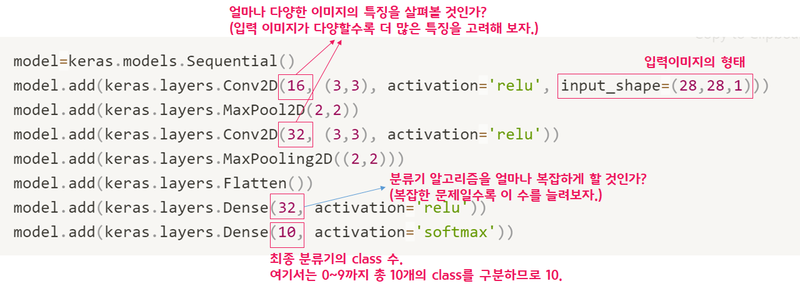

* Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수입니다. 여기서는 16과 32를 사용했습니다. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻입니다. 우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다. 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다. 그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.
* Dense 레이어의 첫 번째 인자는 분류기에 사용되는 뉴런의 숫자 입니다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있습니다. 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.
* 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 클래스 수로 지정하면 됩니다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

**Q. 입력 이미지의 형태 input_shape=(28, 28, 1) 코드가 의미하는 바는 무엇인가?**

: input 데이터가 28 X 28 사이즈인 흑백 이미지를 의미한다.

앞의 두 숫자는 input 데이터의 사이즈를 마지막 숫자는 차원 수를 의미하며 여기서는 채널 수를 의미한다. 

민약, 사용할 input 데이터가 컬러 이미지라면 3개의 색상 채널을 의미하는 3으로 표현해야 한다.

In [11]:
# 만든 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 2-4. 딥러닝 네트워크 학습시키기

우리가 만든 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태를 가진다. 

이전 스텝에서 첫 번째 레이어에 input_shape=(28,28,1)로 지정했었다.(input 데이터가 28 X 28 사이즈인 흑백 이미지)

그런데 print(x_train.shape) 을 해보면, (60000, 28, 28) 로 채널수에 대한 정보가 없다. 따라서 (60000, 28, 28, 1) 로 만들어 주어야 한다 (여기서 채널수 1은 흑백 이미지를 의미한다. 컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3이다).

In [12]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 1) # 데이터 갯수에 -1을 쓰면 reshape시 자동 계산된다.
x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [13]:
# x_train 학습 데이터로 딥러닝 네트워크를 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1842 - accuracy: 0.9434
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0596 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0439 - accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0275 - accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0225 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 32s 17m

각 학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있다. 

인식 정확도가 0.9392에서 0.9958까지 매우 높게 올라가는 것을 볼 수 있다. 

9 epoch정도부터는 인식률의 상승이 미미하다. 

10 epoch정도 학습을 시키면 충분할 것 같다. (학습할 때마다 인식 정확도는 변동됨을 참고!)

## 2-5. 얼마나 잘 만들었는지 확인하기

**테스트 데이터로 성능을 확인해 보자**

위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것이다. 즉, 연습문제를 잘푸는 인공지능을 만든 것으로, 우리가 만든 딥러닝 네트워크가 실제 시험도 잘 볼 수 있는지 확인해야 한다.

시험용 데이터(x_test)를 가지고 확인해 보자.

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0546 - accuracy: 0.9848
test_loss: 0.05456087738275528
test_accuracy: 0.9847999811172485


99.58점을 받을 줄 알았는데, 99.01로 시험점수가 소폭 하락했다. (학습할 때마다 test_loss, test_accuracy 도 변동된다.) 역시 연습문제보다 실제 시험문제가 더 어려운가 보다. 위 MNIST 데이터셋 참고문헌을 보면 학습용 데이터와 시험용 데이터의 손글씨 주인이 다른 것을 알 수 있다. 즉, 한 번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높다. 어찌 보면 인식률이 떨어지는 것은 어느 정도 예상 가능한 일임을 알 수 있다.

**어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자**

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수이다. 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 것이다.

In [15]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [3.4544648e-12 1.8480025e-11 2.4598759e-10 2.8560501e-09 2.2487977e-12
 9.1872170e-12 2.7094069e-17 1.0000000e+00 2.7471369e-11 1.3269257e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


model.predict() 결과가 벡터 형태로 나왔다. 이 벡터는 model이 추론한 결과가 각각 0, 1, 2, ..., 7, 8, 9일 확률을 의미한다.

이 경우라면 model이 추론한 결과가 7일 확률이 1.00에 근접하고 있다, 즉 이 model은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻이 된다.

정말 숫자 7일까?

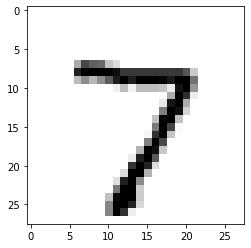

In [16]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [8.6910448e-05 3.6664230e-06 1.1214204e-07 9.8136494e-05 4.0353471e-04
 5.4299748e-01 1.6468499e-10 5.4325719e-06 3.0163401e-06 4.5640171e-01]
라벨: 9, 예측결과: 5


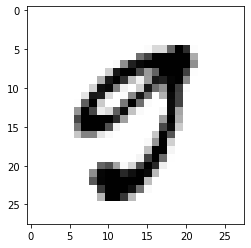

예측확률분포: [4.1432129e-05 2.6689223e-03 5.7520628e-01 1.2816752e-05 1.0022851e-08
 1.4644304e-06 1.7501064e-08 2.3896086e-01 1.8310595e-01 2.2859085e-06]
라벨: 7, 예측결과: 2


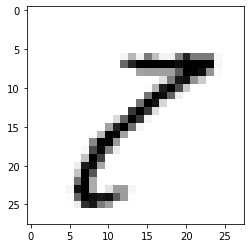

예측확률분포: [5.3296089e-01 8.3609751e-07 1.3562960e-06 2.1435309e-04 1.2295665e-06
 4.6362817e-01 3.1924283e-03 3.9442487e-08 1.5527100e-08 6.8033006e-07]
라벨: 5, 예측결과: 0


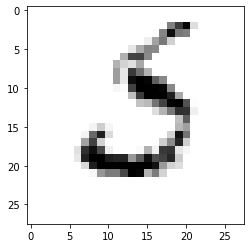

예측확률분포: [9.36893979e-04 1.02190506e-10 5.64958811e-01 2.06160289e-09
 1.23237309e-10 9.47244189e-06 1.50277549e-06 4.21750024e-10
 4.34090704e-01 2.60185288e-06]
라벨: 8, 예측결과: 2


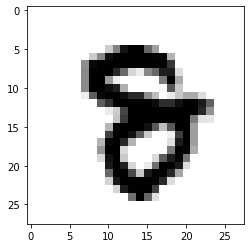

예측확률분포: [9.3386793e-01 1.8167100e-11 1.8220788e-05 2.8602374e-09 2.9101263e-13
 8.9636347e-07 6.6112965e-02 6.2653828e-18 3.6551768e-08 8.0655820e-09]
라벨: 6, 예측결과: 0


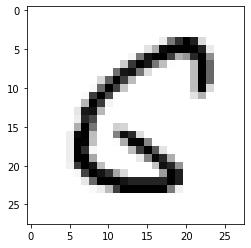

In [17]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있다. model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나이다.

## 2-6. 더 좋은 네트워크 만들어 보기

그러면 인식률을 99점대로 만들 수 없을까? 딥러닝 네트워크의 구조 자체는 바꾸지 않으면서도 우리가 해볼 수 있는 것들이 있다. 

3번째 스텝 딥러닝 네트워크 설계하기에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것이다. 

Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나, Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 횟수인 epoch 값을 변경해 볼 수 있다.

In [18]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               